In [1]:
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
import networkx as nx

In [14]:
def construct_state_space(k):
    if k==1:
        return [(0, ), (1, )]
    else:
        prev = construct_state_space(k-1) 
        return [(0, ) + t for t in prev] + [(1, ) +t for t in prev]
    
n = 4
state_space = construct_state_space(n)
assert len(state_space) == 2**n
state_space

[(0, 0, 0, 0),
 (0, 0, 0, 1),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 1, 0, 0),
 (0, 1, 0, 1),
 (0, 1, 1, 0),
 (0, 1, 1, 1),
 (1, 0, 0, 0),
 (1, 0, 0, 1),
 (1, 0, 1, 0),
 (1, 0, 1, 1),
 (1, 1, 0, 0),
 (1, 1, 0, 1),
 (1, 1, 1, 0),
 (1, 1, 1, 1)]

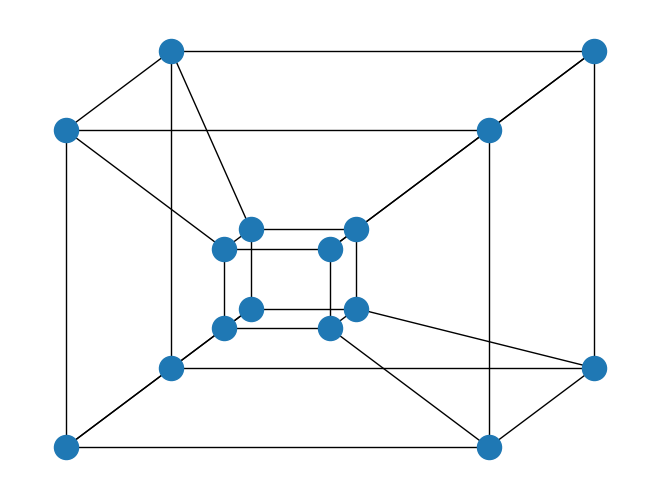

In [6]:
n = 4
G = nx.hypercube_graph(n)
positions =  {(i,j,k,l): np.array([-(-1)**i + 0.5 * k, -(-1)**j+ 0.5 * k]) * 4**l
               for i,j,k,l in state_space}
nx.draw(G, pos=positions)

In [7]:
def draw():
    nx.draw(G, pos=positions,
            node_color=['r' if node in markov_chains.values() else 'b'
                        for node in G.nodes])
    nx.draw_networkx_labels(G, {x: positions[x] + np.array([0., 0.5]) for x in state_space}, {x: x for x in state_space})
    plt.show()

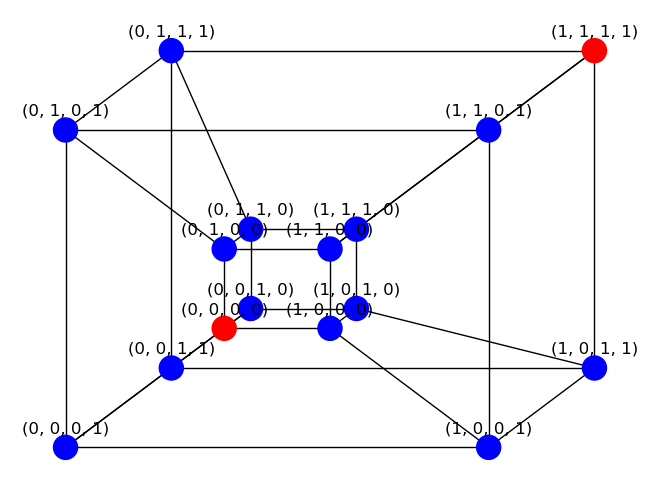

In [10]:
markov_chains = {x: x for x in [(0,0,0,0), (1,1,1,1)]}
draw()

random coordinate is  3
Updating coordinate 3 to be 1 (Bernouli(1/2))


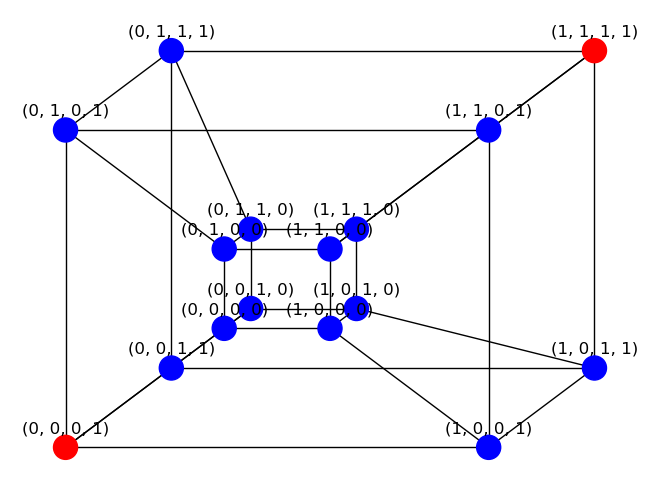

random coordinate is  3
Updating coordinate 3 to be 0 (Bernouli(1/2))


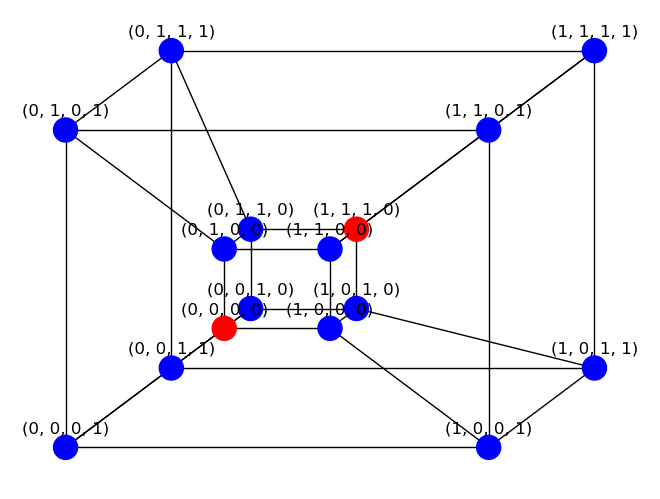

random coordinate is  3
Updating coordinate 3 to be 1 (Bernouli(1/2))


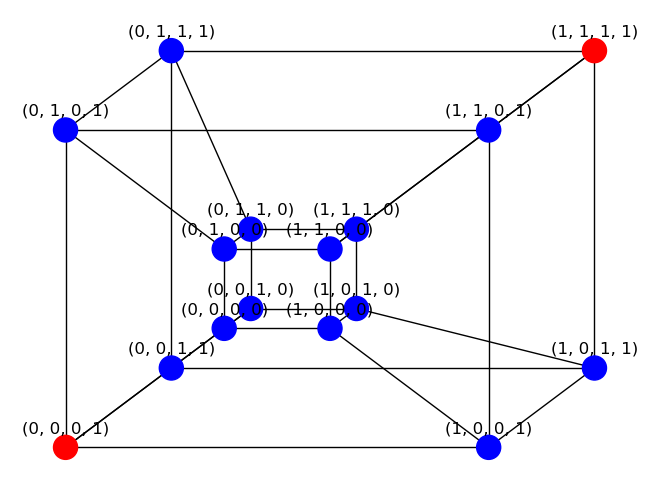

random coordinate is  1
Updating coordinate 1 to be 0 (Bernouli(1/2))


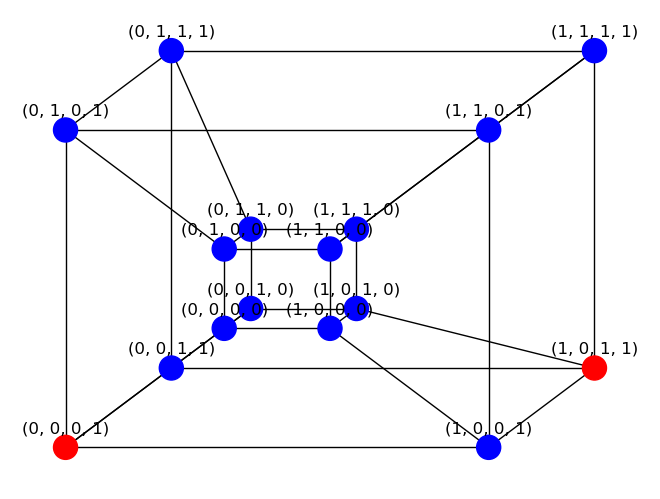

random coordinate is  1
Updating coordinate 1 to be 0 (Bernouli(1/2))


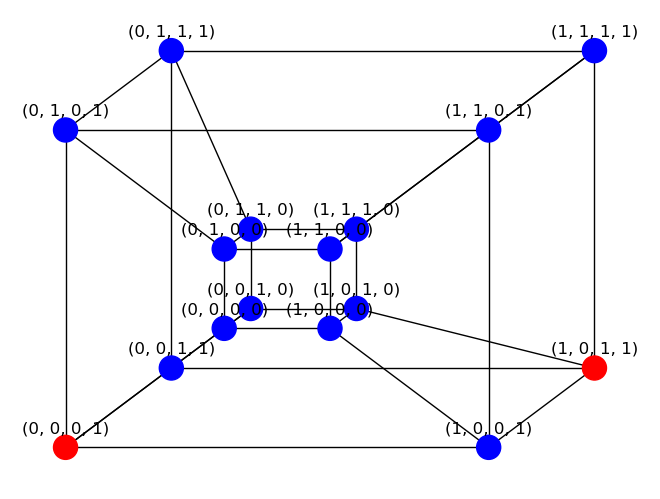

random coordinate is  3
Updating coordinate 3 to be 0 (Bernouli(1/2))


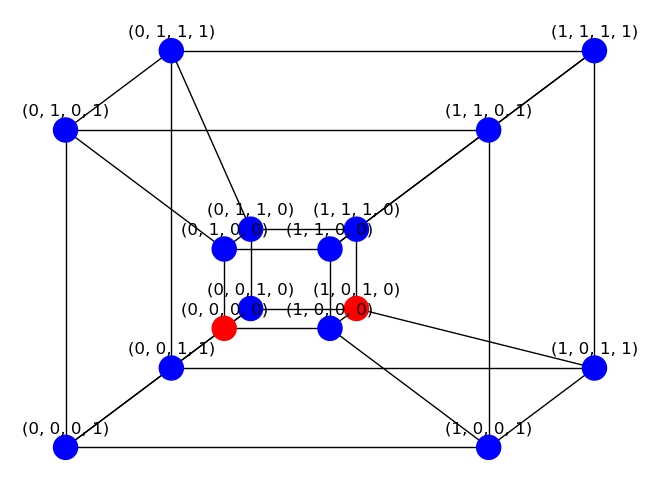

random coordinate is  1
Updating coordinate 1 to be 1 (Bernouli(1/2))


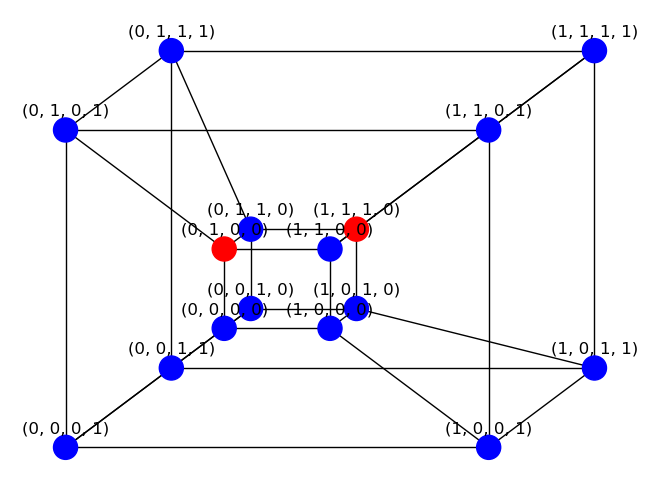

random coordinate is  0
Updating coordinate 0 to be 0 (Bernouli(1/2))


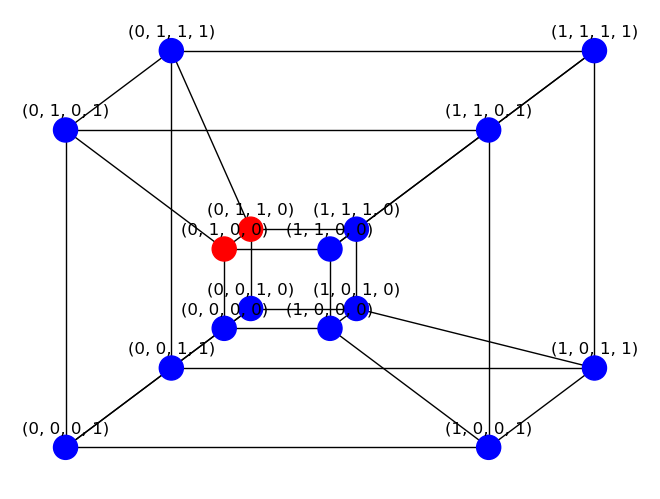

random coordinate is  1
Updating coordinate 1 to be 1 (Bernouli(1/2))


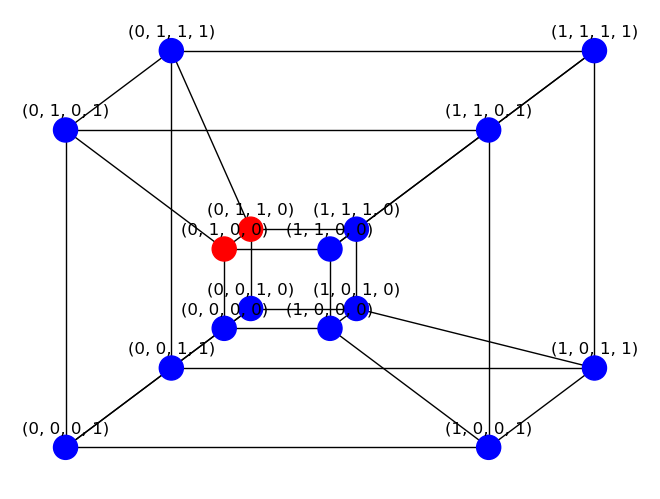

random coordinate is  3
Updating coordinate 3 to be 1 (Bernouli(1/2))


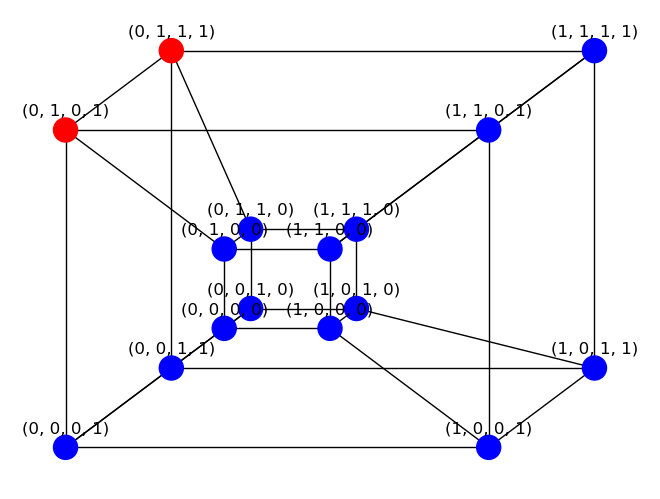

random coordinate is  1
Updating coordinate 1 to be 1 (Bernouli(1/2))


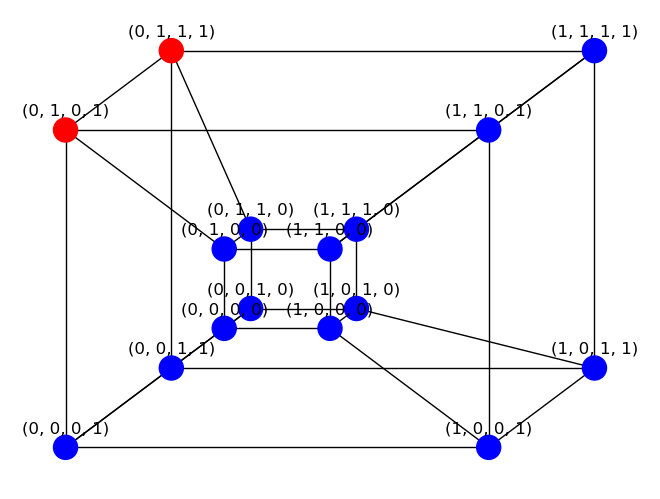

random coordinate is  1
Updating coordinate 1 to be 0 (Bernouli(1/2))


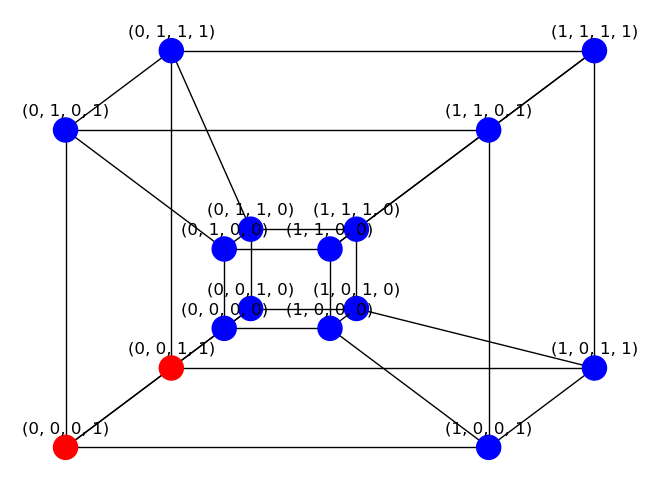

random coordinate is  2
Updating coordinate 2 to be 0 (Bernouli(1/2))


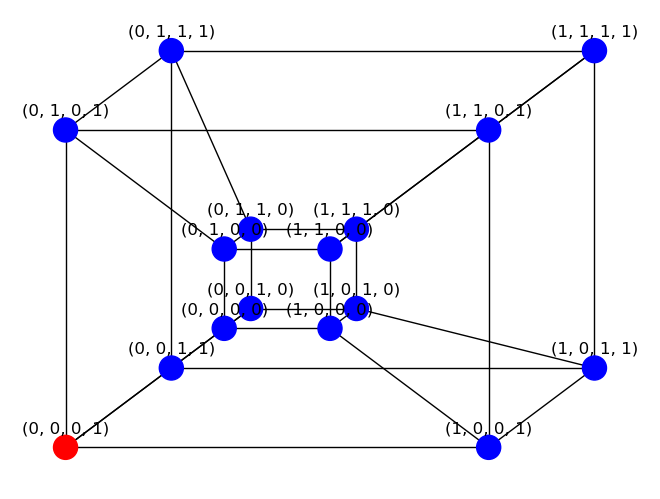

In [11]:
while True:
    random_coordinate = random.choice(range(n))
    print("random coordinate is ", random_coordinate)
    B = np.random.choice([0,1])
    print("Updating coordinate", random_coordinate, "to be", B, "(Bernouli(1/2))")
    for x, current_x in markov_chains.items():
        markov_chains[x] = tuple(B if i == random_coordinate else current_x[i] for i in range(n))
    draw()
    if len(set(markov_chains.values())) <= 1:
        break # stop when the two chains have met

# Grand coupling: concurrent Markov Chains from all possible starting states

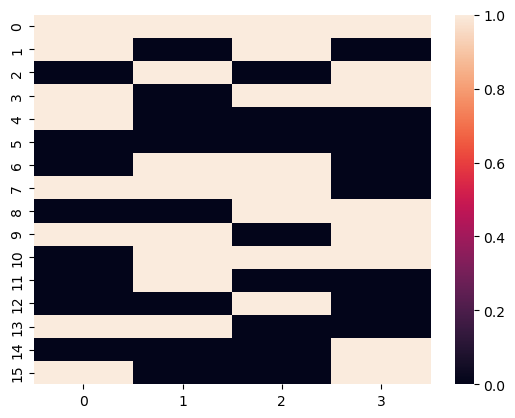

random coordinate is  1
Updating coordinate 1 to be 0


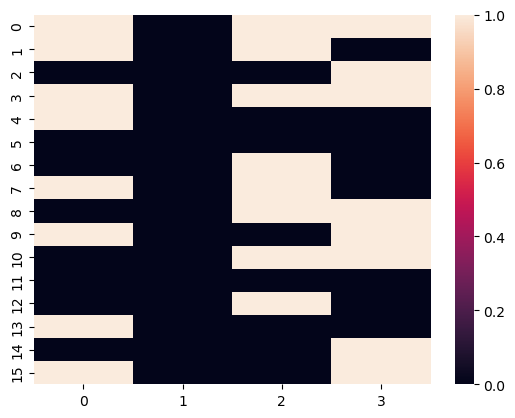

coupon 1 collected
random coordinate is  2
Updating coordinate 2 to be 1


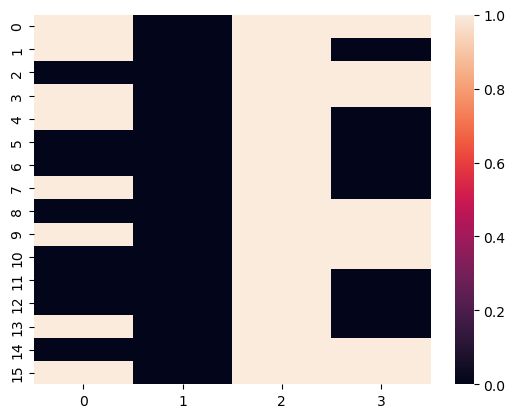

coupon 2 collected
random coordinate is  1
Updating coordinate 1 to be 0


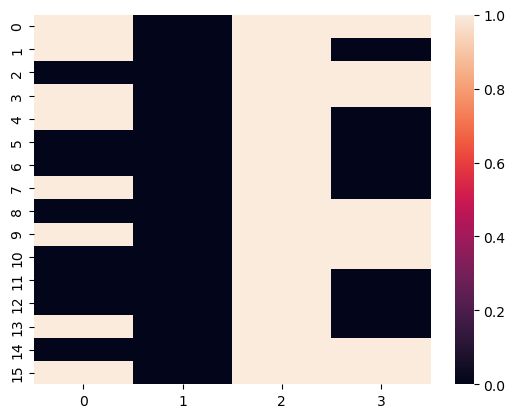

random coordinate is  2
Updating coordinate 2 to be 0


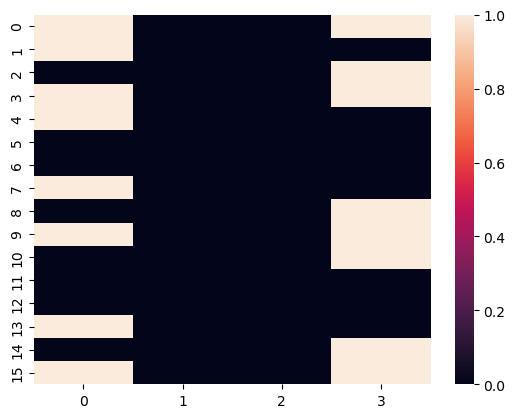

random coordinate is  1
Updating coordinate 1 to be 0


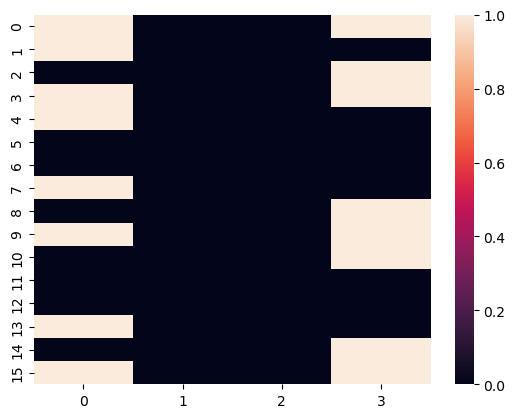

random coordinate is  0
Updating coordinate 0 to be 0


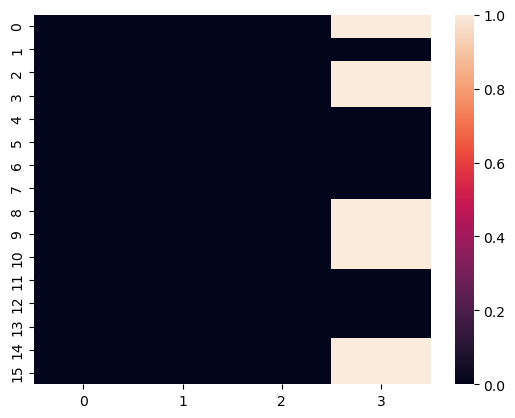

coupon 0 collected
random coordinate is  2
Updating coordinate 2 to be 1


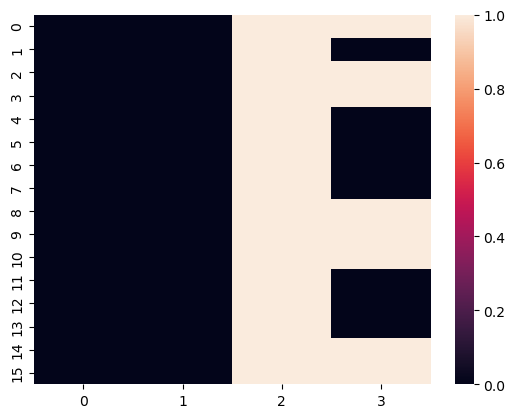

random coordinate is  0
Updating coordinate 0 to be 0


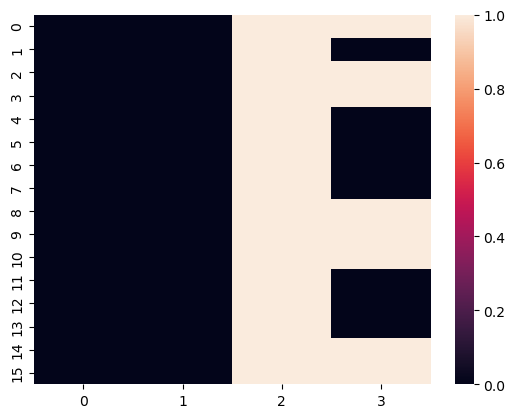

random coordinate is  3
Updating coordinate 3 to be 0


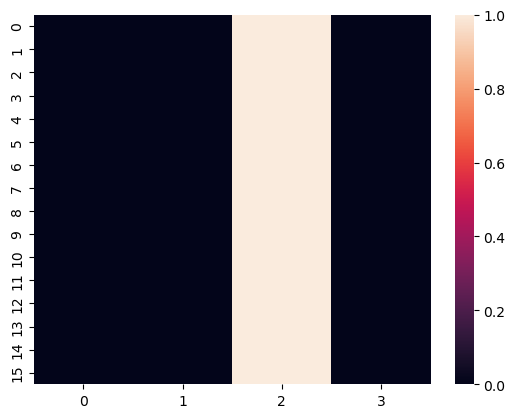

coupon 3 collected


In [20]:
n = 4
state_space = construct_state_space(n)
random.shuffle(state_space)
sns.heatmap(np.array(state_space))
plt.show()
markov_chain = np.array(state_space)
markov_chain 
coupons = set()
while True:
    random_coordinate = random.choice(range(n))
    print("random coordinate is ", random_coordinate)
    B = np.random.choice([0,1])
    markov_chain[:, random_coordinate] = B
    print("Updating coordinate", random_coordinate, "to be", B)
    sns.heatmap(markov_chain)
    plt.show()
    if random_coordinate not in coupons:
        coupons.add(random_coordinate)
        print("coupon", random_coordinate, "collected")
        if len(coupons) == n:
            break

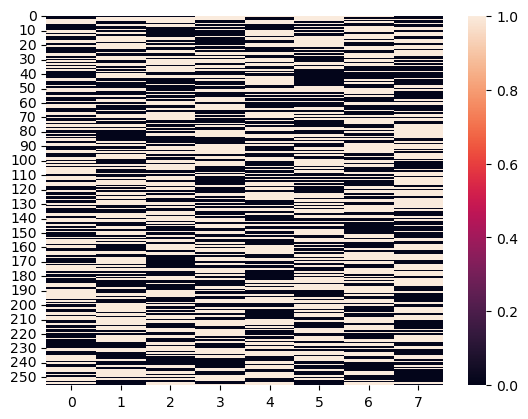

random coordinate is  2
Updating coordinate 2 to be 0


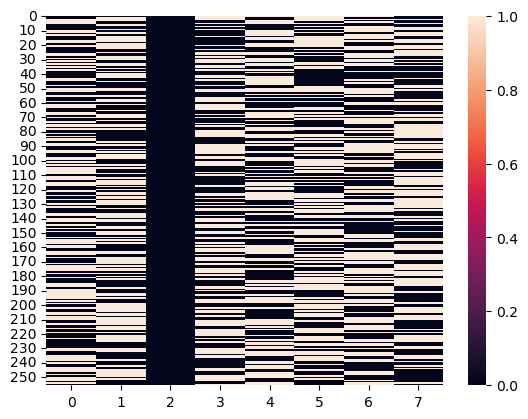

coupon 2 collected
random coordinate is  1
Updating coordinate 1 to be 1


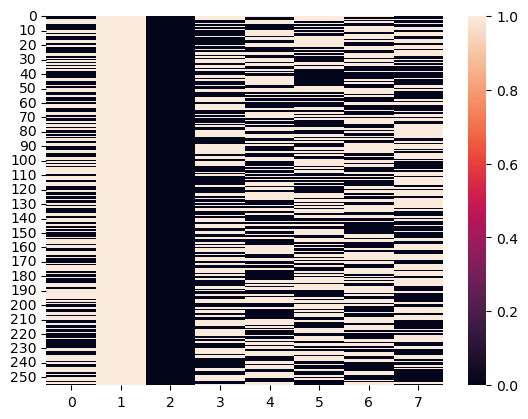

coupon 1 collected
random coordinate is  3
Updating coordinate 3 to be 1


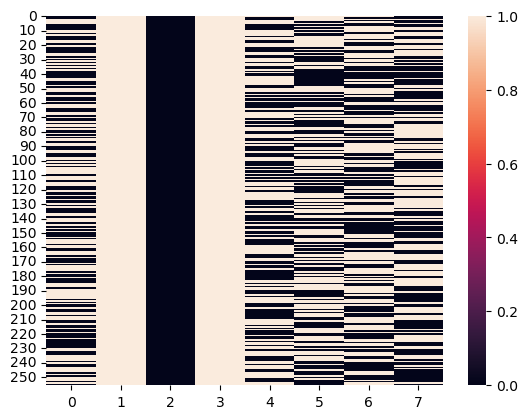

coupon 3 collected
random coordinate is  0
Updating coordinate 0 to be 0


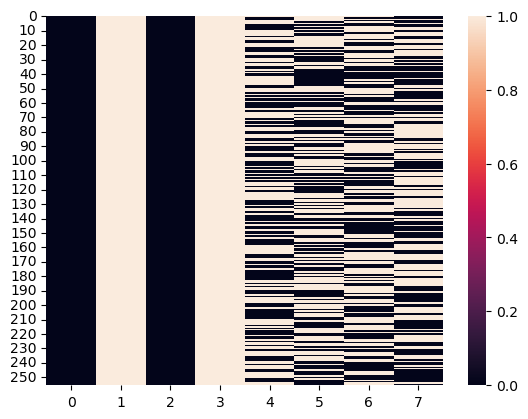

coupon 0 collected
random coordinate is  1
Updating coordinate 1 to be 0


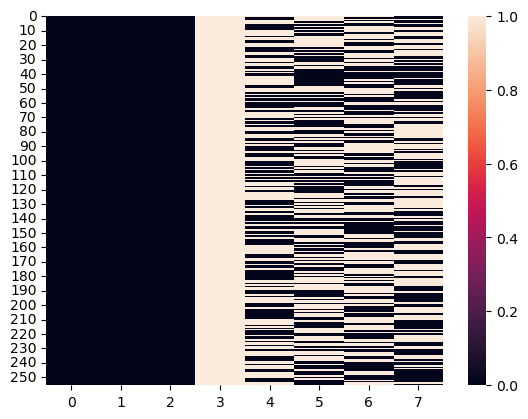

random coordinate is  2
Updating coordinate 2 to be 1


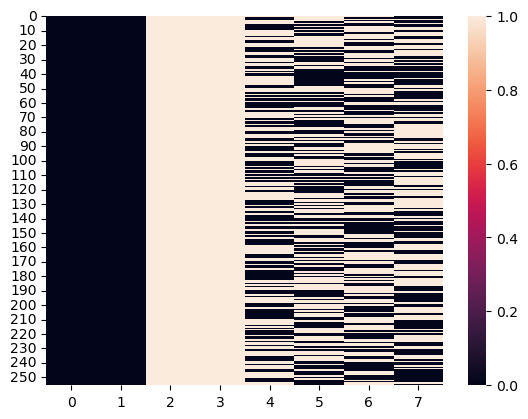

random coordinate is  6
Updating coordinate 6 to be 0


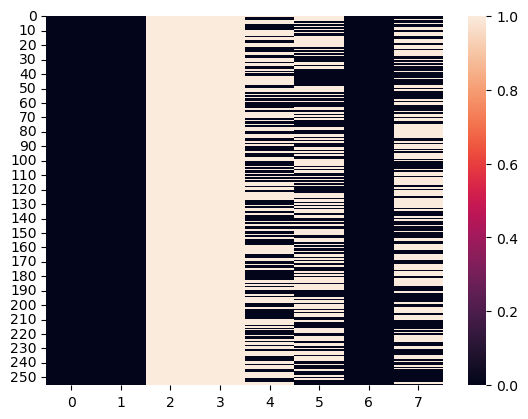

coupon 6 collected
random coordinate is  7
Updating coordinate 7 to be 0


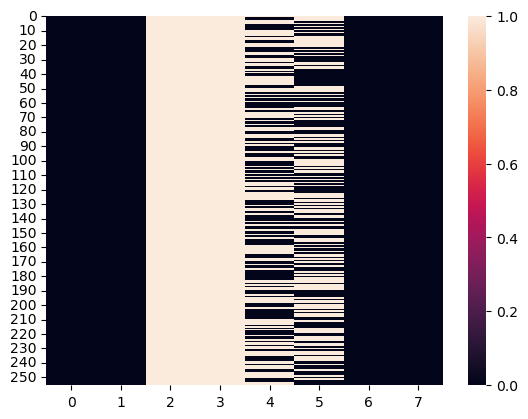

coupon 7 collected
random coordinate is  0
Updating coordinate 0 to be 1


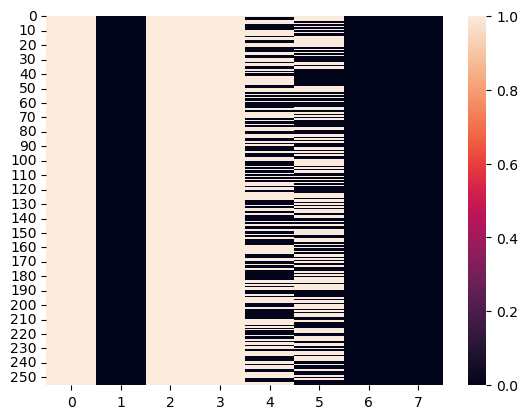

random coordinate is  2
Updating coordinate 2 to be 0


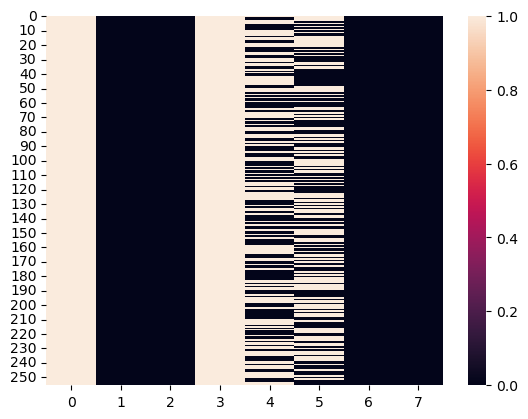

random coordinate is  2
Updating coordinate 2 to be 0


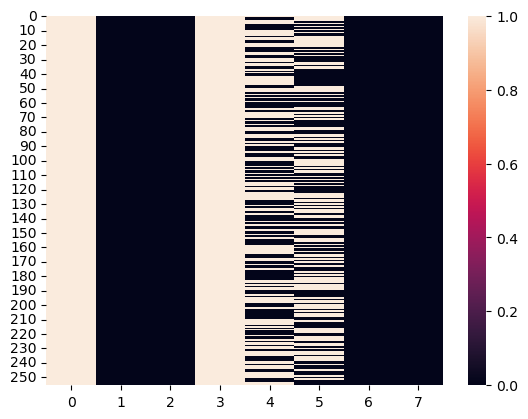

random coordinate is  0
Updating coordinate 0 to be 1


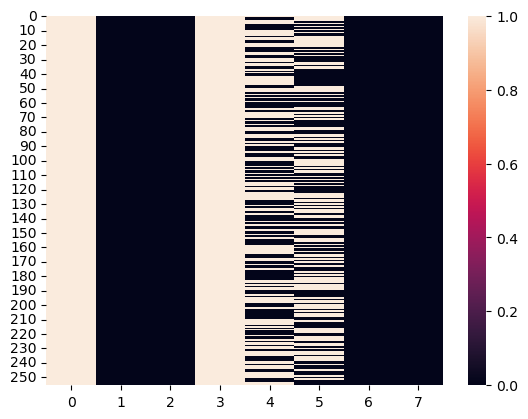

random coordinate is  4
Updating coordinate 4 to be 1


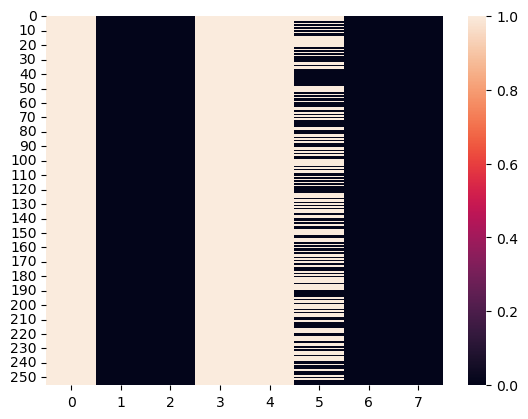

coupon 4 collected
random coordinate is  2
Updating coordinate 2 to be 0


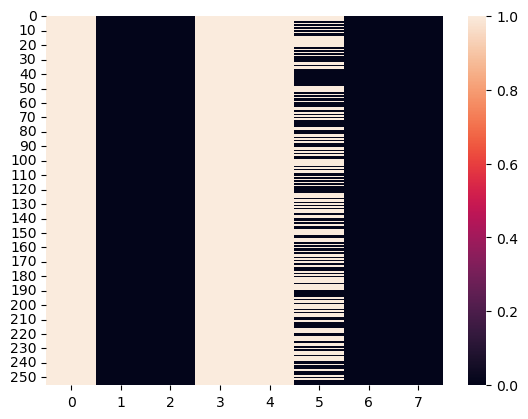

random coordinate is  4
Updating coordinate 4 to be 0


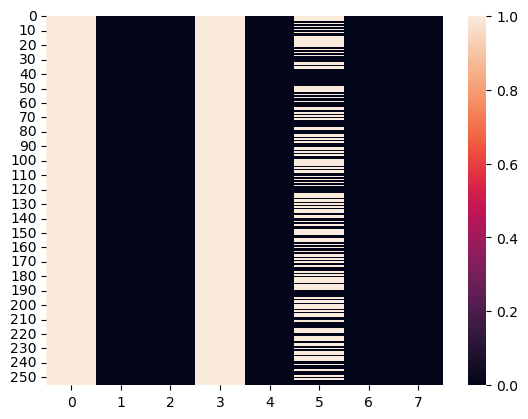

random coordinate is  4
Updating coordinate 4 to be 0


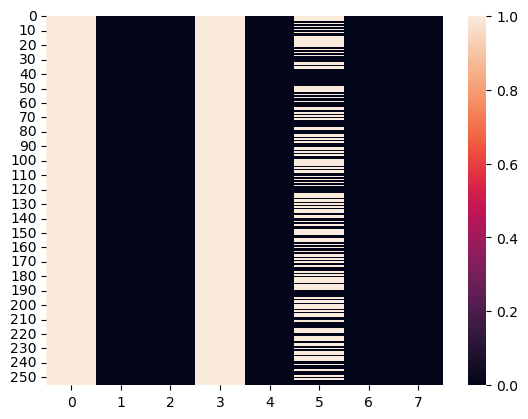

random coordinate is  5
Updating coordinate 5 to be 1


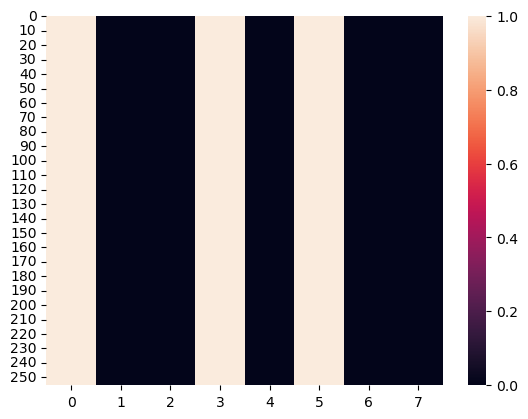

coupon 5 collected


In [19]:
n = 8
state_space = construct_state_space(n)
random.shuffle(state_space)
sns.heatmap(np.array(state_space))
plt.show()
markov_chain = np.array(state_space)
markov_chain 
coupons = set()
while True:
    random_coordinate = random.choice(range(n))
    print("random coordinate is ", random_coordinate)
    B = np.random.choice([0,1])
    markov_chain[:, random_coordinate] = B
    print("Updating coordinate", random_coordinate, "to be", B)
    sns.heatmap(markov_chain)
    plt.show()
    if random_coordinate not in coupons:
        coupons.add(random_coordinate)
        print("coupon", random_coordinate, "collected")
        if len(coupons) == n:
            break